In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('heat_capacity.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
dataset.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa)
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935


In [10]:
dataset.describe()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa)
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,133.040857,0.036232,0.056702,45.636865,52.932790,2.590230,17654.865205,5.467624,1.107142,0.290609,1.848606,4.161920,210.354588,1205.072359
std,50.486926,0.013972,0.018046,47.008192,1.853284,0.022057,2323.047469,3.600441,0.001445,0.027147,0.076532,0.547630,0.928641,40.517471
min,26.541360,-0.033088,0.026968,0.071409,45.112720,2.274126,3935.188000,0.001769,1.103766,0.042286,1.446508,0.927673,206.484100,1004.046047
25%,94.154005,0.028946,0.043094,30.263043,52.016357,2.581674,16297.057500,3.305335,1.106144,0.279638,1.808036,3.841834,209.811825,1183.942603
50%,127.994200,0.035348,0.052987,38.215195,52.736635,2.591572,17649.025000,5.045203,1.107308,0.294467,1.852756,4.160544,210.279300,1202.508025
75%,158.808100,0.041557,0.067519,51.321017,53.526070,2.601879,18957.250000,6.857354,1.108413,0.307331,1.896079,4.468942,210.815450,1220.516474
max,738.702100,0.227802,0.268306,1950.000000,71.628940,2.683704,47096.910000,26.108920,1.109286,0.370065,2.201833,11.102530,226.004300,1760.626960


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [13]:
y_test_pred = regressor.predict(X_test)

In [14]:
y_train_pred = regressor.predict(X_train)

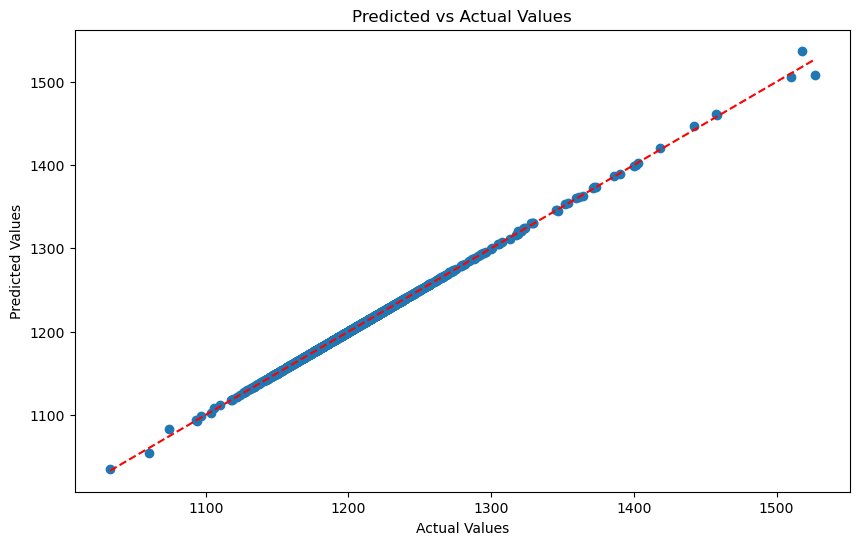

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

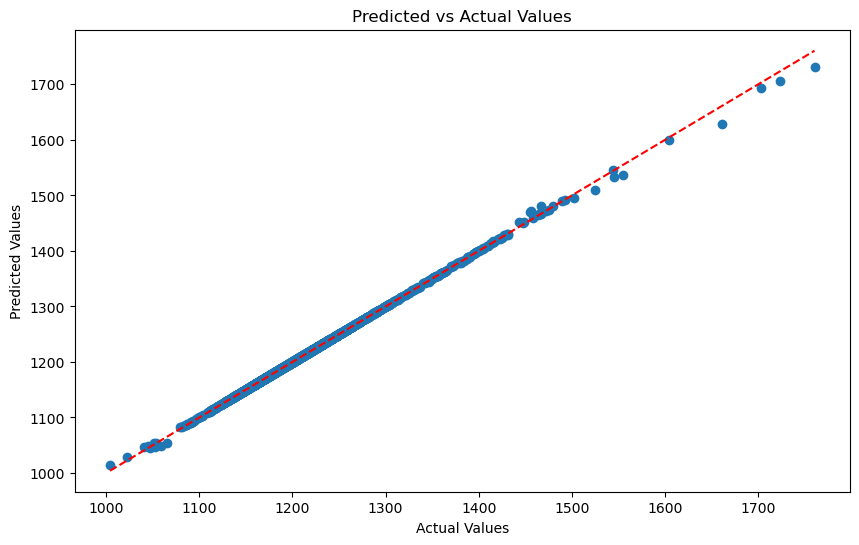

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [18]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_test_pred)) / np.array(y_test))) * 100

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape, "%")

Mean Squared Error: 0.5028696863138055
Root Mean Squared Error: 0.7091330526169299
Mean Absolute Error: 0.07953078350619076
R² Score: 0.9996539992929542
Mean Absolute Percentage Error: 0.006129196592565079 %


In [19]:
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mape = np.mean(np.abs((np.array(y_train) - np.array(y_train_pred)) / np.array(y_train))) * 100

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape, "%")

Mean Squared Error: 0.5750319485864485
Root Mean Squared Error: 0.7583086103865948
Mean Absolute Error: 0.0597943791838684
R² Score: 0.9996594248045885
Mean Absolute Percentage Error: 0.0044312233813061 %


In [20]:
predictions = regressor.predict(X)

In [21]:
new_df = pd.DataFrame({'Predictions': predictions})
joined_data = dataset.join(new_df)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1202.583515
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1201.010947
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1188.325642
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1195.346313
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1192.484367


In [22]:
dataset_thermal = pd.read_csv('thermal_conductivity.csv')

In [24]:
N = dataset_thermal.iloc[:, 0]
print(N)

0        6008.0
1        6008.5
2        6009.0
3        6009.5
4        6010.0
         ...   
9685    10890.0
9686    10890.5
9687    10891.0
9688    10891.5
9689    10892.0
Name: MD, Length: 9690, dtype: float64


In [25]:
new = pd.DataFrame({'Depth': N})
joined_data = joined_data.join(new)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions,Depth
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1202.583515,6008.0
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1201.010947,6008.5
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1188.325642,6009.0
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1195.346313,6009.5
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1192.484367,6010.0


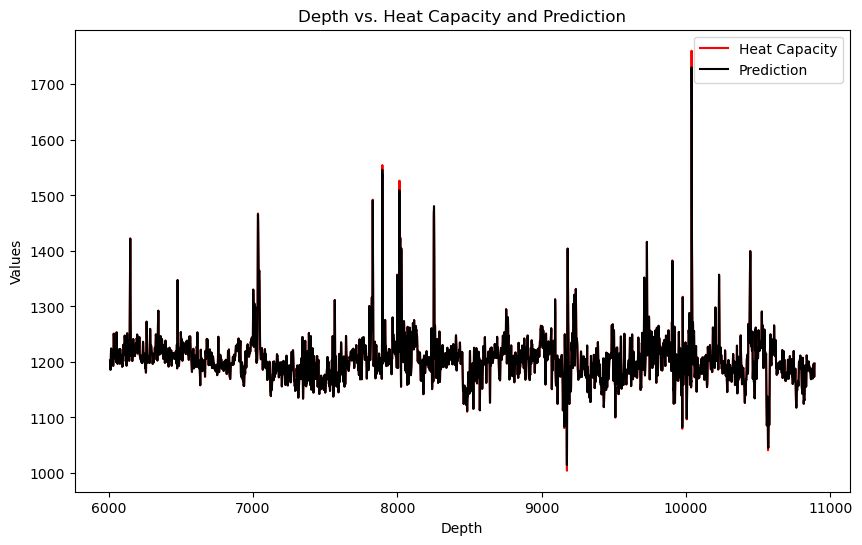

In [31]:
plt.figure(figsize=(10, 6))

# Plotting Heat Capacity vs. Depth
plt.plot(joined_data['Depth'], joined_data['C(capa)'], label='Heat Capacity', color='red')

# Plotting Prediction vs. Depth
plt.plot(joined_data['Depth'], joined_data['Predictions'], label='Prediction', color='black')

# Line of perfect prediction for Heat Capacity (y=x line assuming Prediction ideally matches Heat Capacity)


# Adding labels and legend
plt.xlabel('Depth')
plt.ylabel('Values')
plt.title('Depth vs. Heat Capacity and Prediction')
plt.legend()  # Automatically uses labels from each plot command

# Show the plot
plt.show()